# Assignment 4: Convolutional Neural Networks (Solution)
---

In this assignment, we will use the MNIST dataset
([link](https://en.wikipedia.org/wiki/MNIST_database)) that contains images of hand-written digits from 0 to 9. 

You will need several libraries and built-in functions. Make sure you can compile the following code before proceeding.

                    import numpy as np
                    import matplotlib.pyplot as plt 
                    from tensorflow import keras
                    from keras.datasets import mnist 
                    from keras.models import Sequential
                    from keras.layers import Dense, Dropout, Flatten
                    from keras.layers import Conv2D, MaxPooling2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Exercises

Let's first load and examine the dataset.

- Use `mnist.load_data()` to load the data ([link](https://keras.io/api/datasets/mnist/)). This function will automatically split the dataset into training set and test set. Store them in `x_train`, `y_train`, `x_test`, and `y_test`; and check the dimensions of these variables.  
- Create other necessary variables and set their values: `epochs` to 1, `num_classes` to 10 (since we have 0 to 9, in total 10 digits), and `batch_size` to 128. 
- Use the following code to set up `input_shape` for later use.

                    ### specify the input image dimensions
                    img_rows, img_cols = 28, 28

                    ### specify the input_shape
                    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
                    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
                    input_shape = (img_rows, img_cols, 1)
                    print(input_shape)

In [ ]:
### load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### print the dimensions
print(f"\nx_train shape = {x_train.shape}")
print(f"x_test shape  = {x_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape  = {y_test.shape}\n")

### set other necessary variables
batch_size = 128
num_classes = 10
epochs = 1


x_train shape = (60000, 28, 28)
x_test shape  = (10000, 28, 28)
y_train shape = (60000,)
y_test shape  = (10000,)



In [ ]:
### specify input image dimensions
img_rows, img_cols = 28, 28

### specify the input_shape
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)

(28, 28, 1)


- Use the following code to visualize sample images in the training set.

                    fig, ax = plt.subplots(4,4,figsize = (10,11), dpi = 80)
                    for i, ax in enumerate(fig.axes):
                      ax.imshow(np.squeeze(x_train[i]), cmap='gray_r')
                      ax.set_title(f"label = {y_train[i]}")
<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/152453628-73ee57dd-dbf3-4846-92de-2eb93f750d49.jpg")
"/>

</p>

<p align="center">
  <em>Figure 1: Visual inspection of the MNIST digits dataset</em>
</p>



- Normalize `x_train` and `x_test` (i.e., the pixel values) to the range [0, 1].
- Convert `y_train` and `y_test` to a matrix of binary values. You may find the built-in function `keras.utils.to_categorical` useful.

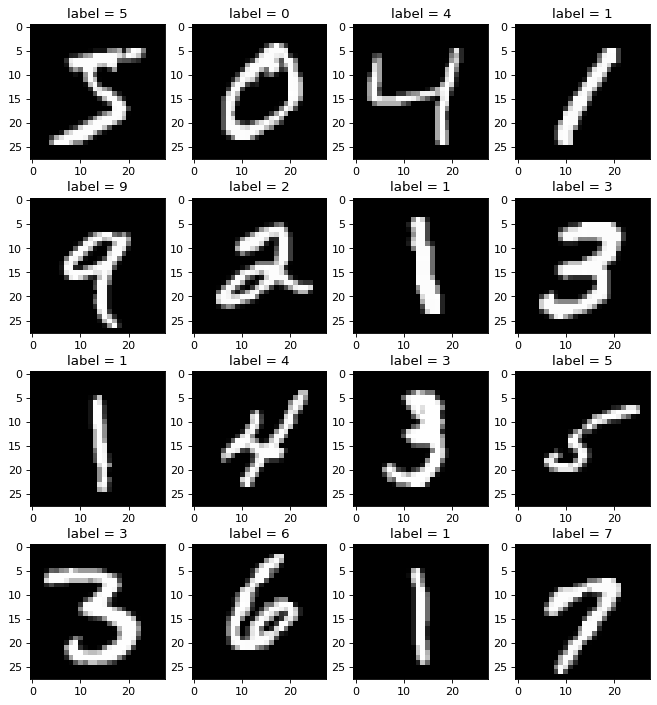

In [ ]:
### visualize sample images
fig, ax = plt.subplots(4,4,figsize = (10,11), dpi = 80)
for i, ax in enumerate(fig.axes):
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(f"label = {y_train[i]}")

### normalize the input
x_train = x_train.astype('float32') # Copy of the array, cast to a specified type.
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### convert class vectors to binary matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now, we have finished processing the dataset. Next, let's build a CNN

- Initialize a Sequential model with following code. 

                  model = Sequential()

- Use `model.add()` to build a CNN with the following architecture.

  - 1st layer: convolutional layer with `32` filters, kernel size `3` by `3`, activation function ReLU.
  - 2nd layer: convolutional layer with `64` filters, kernel size `3` by `3`, activation function ReLU.
  - 3rd layer: pooling layer with max pooling and pooling size `2` by `2`.
  - Add dropout with the ratio `0.25`.
  - 4th layer: flatten layer.
  - 5th layer: dense layer with `128` nodes and activation function ReLU.
  - Add dropout with the ratio `0.25`.
  - 6th layer (final layer): dense layer with the number of classes and activation function Softmax.

- Use `model.summary()` to check the built CNN.

- References: Conv2D ([link](https://keras.io/api/layers/convolution_layers/convolution2d/)), Dense ([link](https://keras.io/api/layers/core_layers/dense/)), Flatten ([link](https://keras.io/api/layers/reshaping_layers/flatten/)), Dropout ([link](https://keras.io/api/layers/regularization_layers/dropout/))




In [ ]:
"""
design the architecture of a model
"""
model = Sequential()

model.add(Conv2D(filters=32,
                  kernel_size=(3, 3),  
                  activation='relu',
                  input_shape=input_shape))  
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

Let's train the CNN we just built.

- Compile the model by setting
  - `loss` to `keras.losses.categorical_crossentropy` 
  - `optimizer` to `keras.optimizers.Adam()` 
  - `metrices` to `[`'`accuracy`'`]`

- Train the model and report the results. See docs ([link](https://keras.io/api/models/model_training_apis/)) for references on `compile` and `fit` methods.

In [ ]:
"""
model training 
"""
model.compile(loss=keras.losses.categorical_crossentropy,  
              optimizer=keras.optimizers.Adam(),  
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy:', score[1])

469/469 [==============================] - 154s 324ms/step - loss: 0.1872 - accuracy: 0.9428 - val_loss: 0.0453 - val_accuracy: 0.9842
Test accuracy: 0.9842000007629395


Now, you have trained your first CNN. Congratulations! Usually, you'd want to save your trained model for future use. Or you may want to use a trained model from others. So, knowing how to save a model and load a model are very important skills.

- Could you try to save the above trained model trained and load it again to test the test set again?
- Model load and save reference ([link](https://www.tensorflow.org/guide/keras/save_and_serialize))

In [ ]:
"""
save the trained model for future use
Load it and test
"""
model.save("my_model")

### load a model
loaded_model = keras.models.load_model("my_model")

### apply the model
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: = {round(100*score[1],2)}%")

INFO:tensorflow:Assets written to: my_model/assets
Test accuracy: = 98.42%
